In [9]:
import os
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline

from utils import tools, losses
from datasets.lunar_analogue import LunarAnalogueDataGenerator
from models.incremental_pca import IncrementalPCA
from modules.pca_base_module import PCABaseModule

In [2]:
DEFAULT_CONFIG_FILE = 'configs/pca.yaml'
config = tools.config_from_command_line(os.path.join(os.getcwd(), '..', DEFAULT_CONFIG_FILE))

# Initialize datagenerator
datagenerator = LunarAnalogueDataGenerator(config)

# Initialize model. With n_component=None the number of features will
# autoscale to the batch size
model = IncrementalPCA(n_components=None)

# Initialize experimental module
module = PCABaseModule(datagenerator, model, config)

Experimental parameters
-----------------------
root_data_path: /home/brahste/Datasets/LunarAnalogue
glob_pattern_train: **/all*/*.jpeg
glob_pattern_test: **/all*/nov*/**/*.jpeg
train_fraction: 0.75
batch_size: 200
experiment_name: PCA
log_directory: experiments/logs 



In [3]:
# Generate batches and fit data with incremental PCA.
# Generally larger batches perform better because a more detailed
# representation of the data is obtained when less dimensionality
# reduction takes place
module.fit_pca(fast_dev_run=1)

Initializing new train generator with 5119 samples...
Fit:  0


/home/brahste/miniconda3/envs/pytorch/lib/python3.8/site-packages/sklearn/decomposition/_incremental_pca.py:313: RuntimeWarning: Mean of empty slice.
  explained_variance[self.n_components_:].mean()
/home/brahste/miniconda3/envs/pytorch/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Initializing new test generator with 548 samples...
Transform:  0


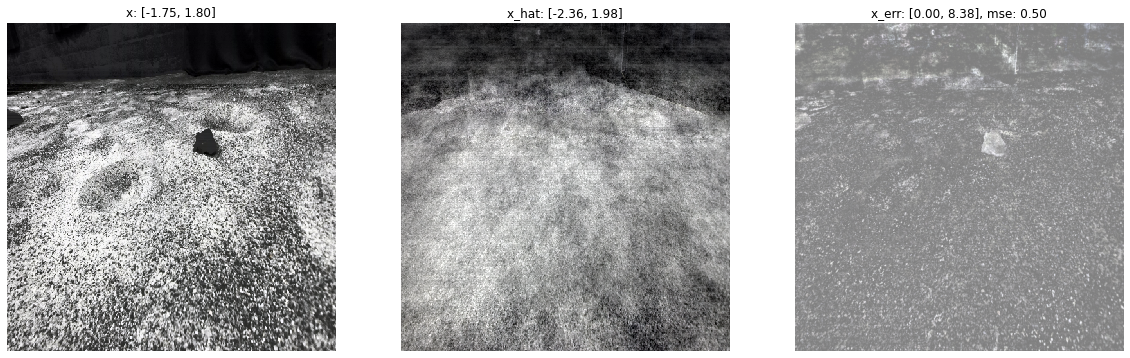

Transform:  1
400


In [33]:
novelty_scores = np.array(module.transform_pipeline())
print(len(novelty_scores))

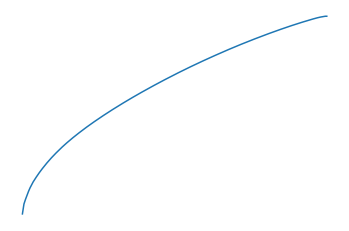

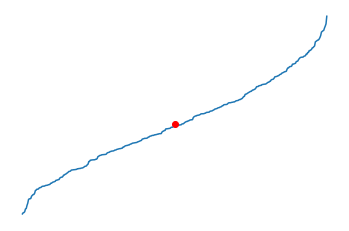

In [35]:
module.explained_variance_ratio.cumsum()
plt.plot(module.explained_variance_ratio.cumsum())
plt.show()

plt.plot(sorted(novelty_scores))
plt.plot(len(novelty_scores)/2, novelty_scores.mean(), 'ro')

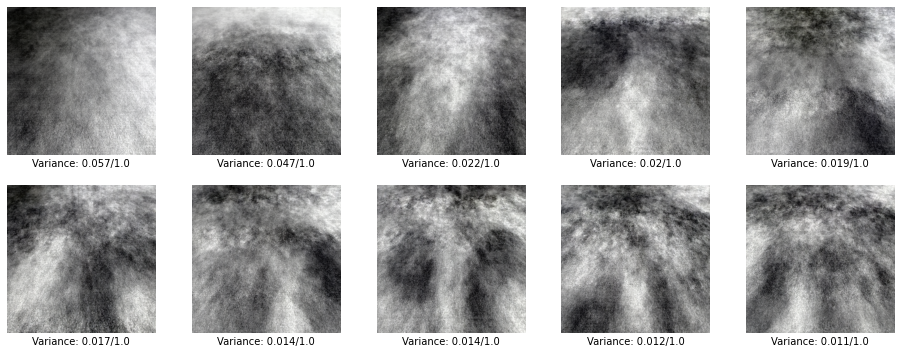

In [28]:
comps = module.components
b = 0

fig, ax = plt.subplots(2, 5, figsize=(16, 6))

mpl.rcParams['axes.spines.left'] = False
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.bottom'] = False
mpl.rcParams['xtick.bottom'] = False
mpl.rcParams['ytick.left'] = False
mpl.rcParams['xtick.labelbottom'] = False
mpl.rcParams['ytick.labelleft'] = False


for i in range(2):
    for j in range(5):

        ax[i, j].imshow(tools.unstandardize_batch(comps[i*5 + j].reshape(512, 512, 3)))
        ax[i, j].set_xlabel(f'Variance: {module.explained_variance_ratio[i*5 + j]:.2}/1.0')
    
plt.show()